In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
import pickle
import tikzplotlib
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)
casename="henon"

In [2]:
if casename=="logistic":
    from reservoirpy.datasets import logistic_map
    ts=logistic_map(100000, r=3.9, x0=0.5).flatten()
elif casename=="henon":
    from run_reservoir import henon1d   
    ts = henon1d(10000)

In [3]:
def get_data(ep, num_qubits, num_meas, method, noise="None", decode=True):
    degree=num_meas
    num_reservoirs=20
    timeplex=10
    string_identifier=str(ep)+"_casename"+str(casename)+"_num_qubits"+str(num_qubits)+"_num_meas"+str(num_meas)
    string_identifier+="_degree"+str(degree)+"_num_reservoirs"+str(num_reservoirs)+"_timeplex"+str(timeplex)
    string_identifier+="_method"+str(method)+"_noise"+str(noise)
    if not decode:
        string_identifier+="_decodeFalse"
    string_identifier+=".pickle"
    name="X_train"+string_identifier
    # print("name=",name)
    with open(name,"rb") as f:
        X_train = pickle.load(f)
    
    name="X_test"+string_identifier
    with open(name,"rb") as f:
        X_test = pickle.load(f)
    
    name="score"+string_identifier
    with open(name,"rb") as f:
        score = pickle.load(f)
        
    name="prediction"+string_identifier
    with open(name,"rb") as f:
        prediction = pickle.load(f)
        
    name="state"+string_identifier
    with open(name,"rb") as f:
        state = pickle.load(f)
    return X_train, X_test, score, prediction, state, string_identifier

In [4]:
# X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "classical", "None")
# _=plt.plot(state)

Plot convergence with training

(35, 60) (35,)
(167, 60) (167,)


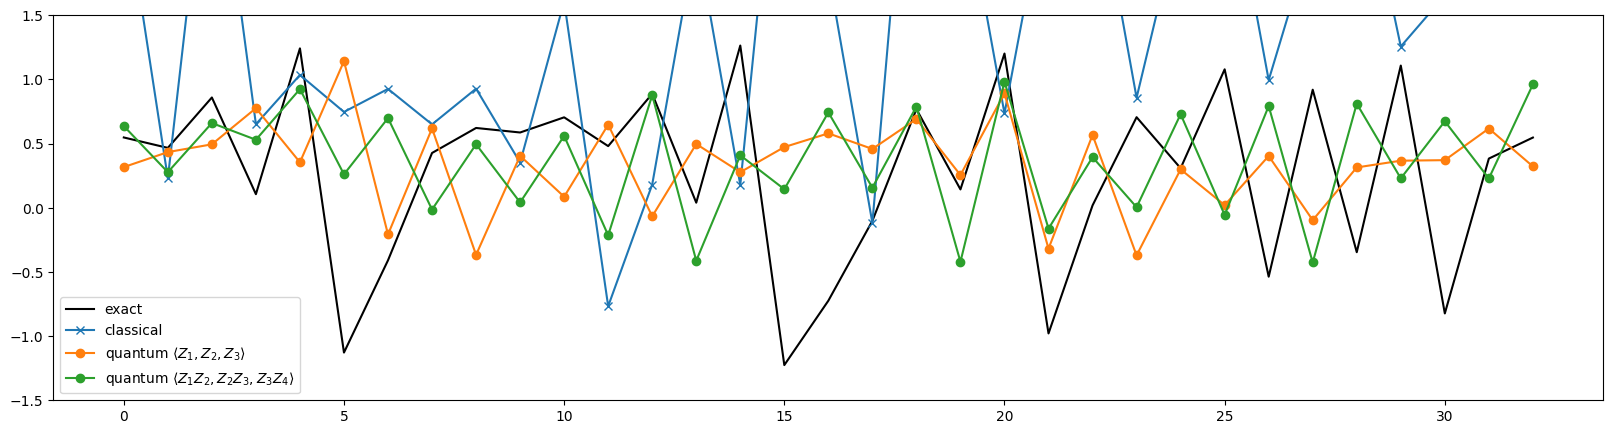

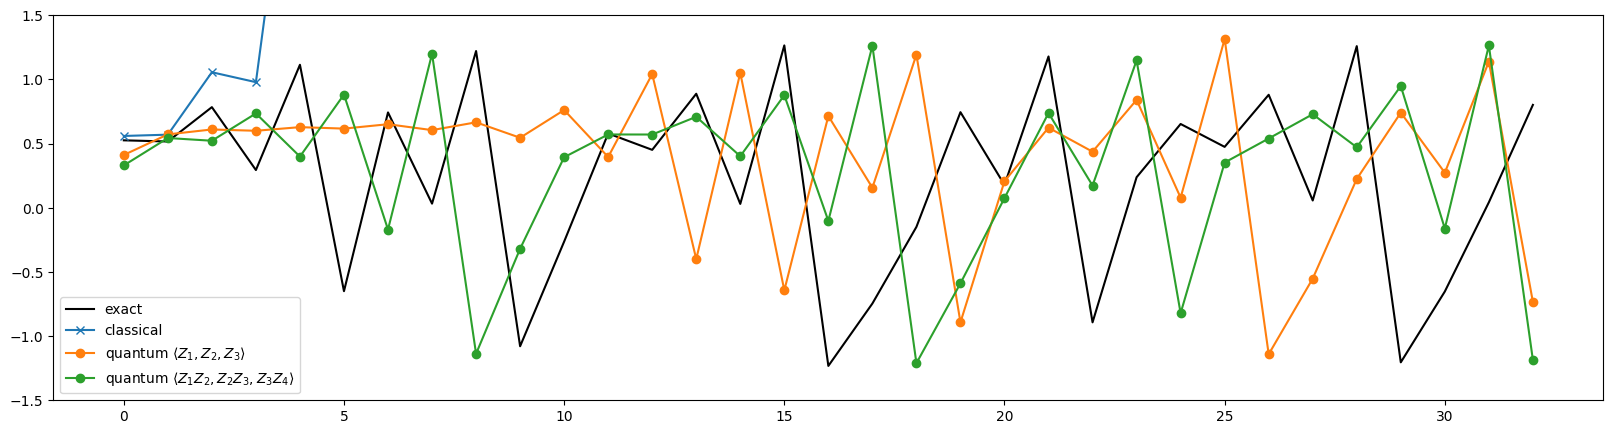

In [15]:

for ep in [0,4]:
    fig=plt.figure(figsize=(20,5))

    X_train, X_test, score, prediction, statec, basen = get_data(ep, 4, 2, "classical", "None")
    
    plt.plot(X_test,'k-', label='exact')
    
    plt.plot(prediction[len(X_train):], 'x-', label="classical")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 2, "quantum_part", "None")
    plt.plot(prediction[len(X_train):], 'o-', label=r"quantum $\langle Z_1, Z_2, Z_3\rangle$")
    print(state.shape,X_train.shape)
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 2, "quantum_stab", "None")
    plt.plot(prediction[len(X_train):], 'o-', label=r"quantum $\langle Z_1Z_2, Z_2Z_3, Z_3Z_4\rangle$")
    
    # plt.plot(ts[15:prediction[ty].shape[0]],label='ground truth')
    # plt.plot(np.concatenate([X_train,X_test]))
    # plt.plot(X_test)
    plt.legend(loc="lower left")
    if casename=="logistic":
        plt.ylim([-0,1.1])
    elif casename=="henon":
        plt.ylim([-1.5,1.5])
    # plt.xlim([-1,len(prediction)])
    # plt.fill_between(range(len(X_train)), -2, 2, color='gray', alpha=0.5)
    
    # plt.show()
    fig=tikzplotlib_fix_ncols(fig)
    tikzplotlib.save("convergence_ep"+str(ep)+"_"+basen+".tex")

In [ ]:
# for ep in range(5):
#     X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "None")
#     tmp=prediction[len(X_train):]
#     # plt.plot(tmp)
#     # plt.plot(X_test)
#     # np.cov(tmp, X_test)
#     print("C",ep,"=",np.cov(tmp, X_test)[0][1]**2/(np.var(tmp) * np.var(X_test)))
# # plt.plot(tmp)
# # plt.plot(X_test)

In [ ]:
# fig=plt.figure(figsize=(20,5))

# ep=4

# X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "classical", "None")
# gt=np.concatenate([X_train,X_test])
# plt.plot((prediction-gt)**2, 'x-', label="classical")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# plt.plot((prediction-gt)**2, 'o-', label="quantum part")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "None")
# plt.plot((prediction-gt)**2, 'o-', label="quantum stab")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "True")
# plt.plot((prediction-gt)**2, 'o-', label="quantum part, depolarizing")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "True")
# plt.plot((prediction-gt)**2, 'o-', label="quantum stab, depolarizing")

# # plt.plot(ts[15:prediction[ty].shape[0]],label='ground truth')
# plt.plot()
# plt.legend()
# plt.ylim([-0,1.1])
# plt.xlim([-1,len(prediction)])
# plt.fill_between(range(len(X_train)), -2, 2, color='gray', alpha=0.5)

# # plt.show()
# fig=tikzplotlib_fix_ncols(fig)
# tikzplotlib.save("comparison2_"+basen+".tex")

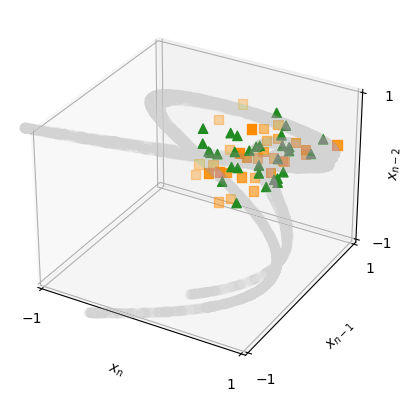

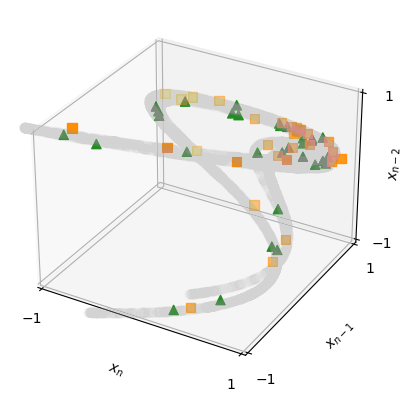

In [45]:
k=1

# for ep in range(5):
for ep in [0,4]:

    if casename=="logistic":
        fig=plt.figure()
        plt.plot(ts[k:],ts[:-k],lw=0, color="gray", marker='o', alpha=.5)
    elif casename=="henon":
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        _=ax.scatter(ts[2:], ts[1:-1], ts[:-2],color="lightgray", s=2**5.5, alpha=.01)
    
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "classical", "None")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'s', label="classical")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 2, "quantum_part", "None")
    tmp=prediction[len(X_train):]
    if casename=="logistic":
        plt.plot(tmp[k:], tmp[:-k],'o', label=r"quantum $\langle Z_1, Z_2, Z_3\rangle$")
    elif casename=="henon":
        _=ax.scatter(tmp[2:], tmp[1:-1], tmp[:-2], marker='s', s=2**5.5, label=r"quantum $\langle Z_1, Z_2\rangle$", color="darkorange")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 2, "quantum_stab", "None")
    tmp=prediction[len(X_train):]
    if casename=="logistic":
        plt.plot(tmp[k:], tmp[:-k],'*', label=r"quantum $\langle Z_1Z_2, Z_2Z_3, Z_3Z_4\rangle$")
    elif casename=="henon":
        _=ax.scatter(tmp[2:], tmp[1:-1], tmp[:-2], alpha=1, marker='^', s=2**5.5, label=r"quantum $\langle Z_1Z_2, Z_2Z_3\rangle$", color="forestgreen")
    
    # RADIUS = 2.0  # Control this value.
    # ax.set_xlim3d(-RADIUS / 2, RADIUS / 2)
    # ax.set_zlim3d(-RADIUS / 2, RADIUS / 2)
    # ax.set_ylim3d(-RADIUS / 2, RADIUS / 2)
    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-1,1)
    ax.set_xticks([-1, 1])
    ax.set_yticks([-1, 1])
    ax.set_zticks([-1, 1])
    ax.set_xlabel('$x_n$')
    ax.set_ylabel('$x_{n-1}$')
    ax.set_zlabel('$x_{n-2}$', rotation=90)
    ax.zaxis.labelpad=-5
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'o', color='lightgreen', label="quantum part, depolarizing")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', color="lightblue", label="quantum stab, depolarizing")
    
    
    # plt.ylim([0,1])
    # plt.xlim([0,1])
    # plt.legend(loc='upper left')
    
    # fig=tikzplotlib_fix_ncols(fig)
    # tikzplotlib.save("convergence2_ep"+str(ep)+"_"+basen+".tex")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# tmp=prediction[len(X_train):]
# plt.plot(tmp[1:], tmp[:-1],'or')

Plot noise vs. noise free

In [ ]:
k=1

# for ep in range(5):
for ep in [0,4]:
    fig=plt.figure()
    
    plt.plot(ts[k:],ts[:-k],lw=0, color="gray", marker='o', alpha=.5)

    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "None")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label="ideal")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', label=r"quantum $\langle Z_1Z_2, Z_2Z_3, Z_3Z_4\rangle$")
    
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_part", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'o', label="depolarizing part")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label="depolarizing stab")
    
    
    # plt.ylim([0,1])
    # plt.xlim([0,1])
    plt.legend(loc='center left')
    
    # fig=tikzplotlib_fix_ncols(fig)
    # tikzplotlib.save("noise_ep"+str(ep)+"_"+basen+".tex")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# tmp=prediction[len(X_train):]
# plt.plot(tmp[1:], tmp[:-1],'or')

Plot that it does not work without the correction step

In [ ]:
k=1

# for ep in range(5):
for ep in [4]:
    fig=plt.figure()
    
    plt.plot(ts[k:],ts[:-k],lw=0, color="gray", marker='o', alpha=.5)
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "None", decode=False)
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'*', color="darkblue", label="no correction", markersize = 10)
    
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "None")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'*', color="lightblue", label="with correction", markersize = 10)
    
    
    # plt.ylim([0,1])
    # plt.xlim([0,1])
    plt.legend(loc='center left')
    
    # fig=tikzplotlib_fix_ncols(fig)
    # tikzplotlib.save("effect_of_correction_ep"+str(ep)+"_"+basen+".tex")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# tmp=prediction[len(X_train):]
# plt.plot(tmp[1:], tmp[:-1],'or')

In [ ]:
fig=plt.figure(figsize=(20,5))

ep=4

X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "None", decode=False)
plt.plot(prediction, 'o-',color="darkblue", label="no correction")
  
    
X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "None")
plt.plot(prediction, 'o-', color="lightblue", label="with correction")

# plt.plot(ts[15:prediction[ty].shape[0]],label='ground truth')
plt.plot()
plt.legend()
plt.ylim([-0,1.1])
plt.xlim([-1,len(prediction)])
plt.fill_between(range(len(X_train)), -2, 2, color='gray', alpha=0.5)

# plt.show()
# fig=tikzplotlib_fix_ncols(fig)
# tikzplotlib.save("effect_of_correction2_ep"+str(ep)+"_"+basen+".tex")

Different number of qubits and measurements

In [ ]:
k=1

# for ep in range(5):
for ep in [4]:
    fig=plt.figure()
    
    plt.plot(ts[k:],ts[:-k],lw=0, color="gray", marker='o', alpha=.5)
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"3 qubits $\langle Z_1, Z_2\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 2, "quantum_part", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"4 qubits $\langle Z_1, Z_2\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_part", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"4 qubits $\langle Z_1, Z_2, Z_3\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 4, "quantum_part", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"7 qubits $\langle Z_1, \cdots, Z_4 \rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "quantum_part", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"7 qubits $\langle Z_1, \cdots, Z_6 \rangle$")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', label=r"quantum $\langle Z_1Z_2, Z_2Z_3, Z_3Z_4\rangle$")
    
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'o', color='lightgreen', label="quantum part, depolarizing")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', color="lightblue", label="quantum stab, depolarizing")
    
    
    # plt.ylim([0,1])
    # plt.xlim([0,1])
    plt.legend(loc='center left')
    
    fig=tikzplotlib_fix_ncols(fig)
    tikzplotlib.save("comparison_numqubits_ep"+str(ep)+"_"+basen+".tex")
    break

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# tmp=prediction[len(X_train):]
# plt.plot(tmp[1:], tmp[:-1],'or')

In [ ]:
k=1

# for ep in range(5):
for ep in [2]:
    fig=plt.figure()
    
    plt.plot(ts[k:],ts[:-k],lw=0, color="gray", marker='o', alpha=.5)
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"3 qubits $\langle Z_1Z_2, Z_2Z_3\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 2, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"4 qubits $\langle Z_1Z_2, Z_2Z_3\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"4 qubits $\langle Z_1Z_2, \cdots, Z_3Z_4\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 4, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"7 qubits $\langle Z_1Z_2, \cdots, Z_4Z_5 \rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"7 qubits $\langle Z_1Z_2, \cdots, Z_6Z_7 \rangle$")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', label=r"quantum $\langle Z_1Z_2, Z_2Z_3, Z_3Z_4\rangle$")
    
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'o', color='lightgreen', label="quantum part, depolarizing")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', color="lightblue", label="quantum stab, depolarizing")
    
    
    # plt.ylim([0,1])
    # plt.xlim([0,1])
    plt.legend(loc='center left')
    
    fig=tikzplotlib_fix_ncols(fig)
    tikzplotlib.save("comparison_numqubits_ep"+str(ep)+"_"+basen+".tex")
    break

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# tmp=prediction[len(X_train):]
# plt.plot(tmp[1:], tmp[:-1],'or')

In [ ]:
def limitrange(topology, dist=2):
    nh = []
    for tmp in topology:
        if abs(tmp[0]-tmp[1])<=2:
            nh.append(tmp)
    return nh

In [ ]:
from itertools import combinations
h=list(combinations(range(7), 2))
nh=limitrange(h)
print(nh)
len(h), len(nh)